In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [2]:
from src import source

In [5]:
l0s, m0s, SDIV = source.abbe_source()

In [4]:
SDIV

array([[122]])

In [5]:
l0s[0][0][:10], m0s[0][0][:10]

([-11, -11, -11, -11, -11, -10, -10, -10, -10, -10],
 [-2, -1, 0, 1, 2, -5, -4, -3, -2, -1])

In [48]:
from src import const
const.mindex[:10], len(const.mindex)

(array([ 0,  0, -1,  0,  1, -1,  0,  1, -2, -1]), 8705)

In [7]:
const.Nrange

8705

In [8]:
from src import intensity
linput, minput, ncut = intensity.find_valid_output_points(const.Nrange)

In [9]:
ncut, linput[:20]

(1901,
 array([-24, -24, -24, -24, -24, -24, -24, -24, -24, -24, -24, -24, -24,
        -23, -23, -23, -23, -23, -23, -23]))

In [2]:
import numpy as np
with open("notebooks/mask.bin", "rb") as f:
    packed = np.frombuffer(f.read(), dtype=np.uint8)
unpacked = np.unpackbits(packed)
mask = unpacked.reshape((2048, 2048))

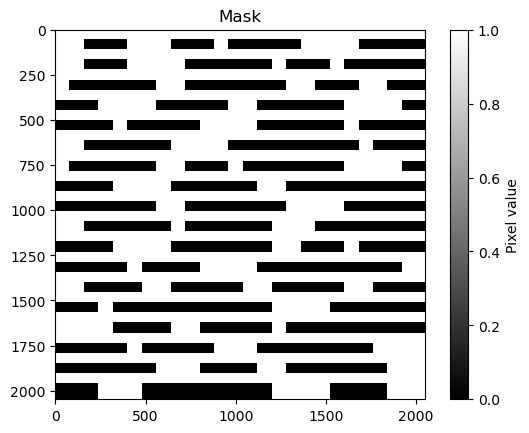

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title("Mask")
plt.colorbar(label="Pixel value")
plt.show()

In [13]:

import numpy as np
nsx=0
nsy=0
kx0 = (
    const.k
    * np.sin(np.deg2rad(const.theta0))
    * np.cos(np.deg2rad(const.phi0))
)
ky0 = (
    const.k
    * np.sin(np.deg2rad(const.theta0))
    * np.sin(np.deg2rad(const.phi0))
)
sx0 = 2.0 * const.pi / const.dx * nsx / const.ndivs + kx0
sy0 = 2.0 * const.pi / const.dy * nsy / const.ndivs + ky0
# Ax = intensity.diffraction_amplitude("X", mask, sx0, sy0)

In [22]:
const.Nrange, kxy2

(8705,
 array([0.05294468, 0.05154224, 0.05016803, ..., 0.05016803, 0.05154224,
        0.05294468]))

In [16]:
# 今個々
import numpy as np
from src import multilayer, const

# kx0: -2.97894e-18
# ky0: -0.0486498
polar = "X"
nsx=0
nsy=0
sx0 = 2.0 * const.pi / const.dx * nsx / const.ndivs + const.kx0
sy0 = 2.0 * const.pi / const.dy * nsy / const.ndivs + const.ky0
kx0 = sx0
ky0 = sy0
#
kxplus = kx0 + 2 * const.pi * np.array(const.lindex) / const.dx
kyplus = ky0 + 2 * const.pi * np.array(const.mindex) / const.dy
kxy2 = kxplus**2 + kyplus**2
k = const.k
matrix_size = const.Nrange

alpha_mo = np.sqrt(k * k * const.epsilon_mo - kxy2)
alpha_mo_si2 = np.sqrt(k * k * const.epsilon_mo_si2 - kxy2)
TMOUL, TMOUR, TMOBL, TMOBR = multilayer.transfer_matrix(
    polar,
    matrix_size,
    kxplus,
    kyplus,
    alpha_mo,
    const.epsilon_mo,
    const.thickness_mo,
    alpha_mo_si2,
    const.epsilon_mo_si2,
)

In [18]:
alpha_mo[:5]
# const.epsilon_mo 

array([0.35993686+0.0035776j , 0.36187961+0.0035584j ,
       0.3633627 +0.00354387j, 0.36378612+0.00353975j,
       0.36418322+0.00353589j])

In [19]:
alpha_mo_si2[:10]
# const.epsilon_mo_si2

array([0.3849815 +0.00236319j, 0.38679859+0.00235209j,
       0.38818656+0.00234368j, 0.38858296+0.00234129j,
       0.38895476+0.00233905j, 0.38994045+0.00233314j,
       0.39033507+0.00233078j, 0.3907052 +0.00232857j,
       0.39124511+0.00232536j, 0.39166245+0.00232288j])

In [21]:
n = 3
TMOUL.toarray()[np.arange(n), np.arange(n)]

array([0.78221074-0.71670654j, 0.77860196-0.71902854j,
       0.77575125-0.7206917j ])

In [22]:
n = 3
TMOUR.toarray()[np.arange(n), np.arange(n)]

array([-0.01169692+0.01169111j, -0.01186771+0.0119683j ,
       -0.01209366+0.01228457j])

In [23]:
n = 3
TMOBL.toarray()[np.arange(n), np.arange(n)]

array([-0.01254774-0.01039902j, -0.01275198-0.01064389j,
       -0.01301613-0.01091916j])

In [ ]:
# 0.0553115 0.053909 0.0528333 0.0525254 0.0522363
kxy2

array([0.05294468, 0.05154224, 0.05016803, ..., 0.05016803, 0.05154224,
       0.05294468])

In [13]:
np.pi

3.141592653589793

In [14]:
np.atan(1.) * 4.

np.float64(3.141592653589793)

In [34]:
Ax.shape

(27, 27, 8705)

In [37]:
const.nsourceX, const.nsourceY, const.Nrange

(27, 27, 8705)

In [41]:
Ax[0, 0][:30]

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [46]:
for i in range(const.nsourceX):
    for j in range(const.nsourceY):
        for k in range(const.Nrange):
            print(f"{i}, {j}, {k}: ", Ax[i, j, k])
            if k > 60:
                break
        break
    break

0, 0, 0:  0j
0, 0, 1:  0j
0, 0, 2:  0j
0, 0, 3:  0j
0, 0, 4:  0j
0, 0, 5:  0j
0, 0, 6:  0j
0, 0, 7:  0j
0, 0, 8:  0j
0, 0, 9:  0j
0, 0, 10:  0j
0, 0, 11:  0j
0, 0, 12:  0j
0, 0, 13:  0j
0, 0, 14:  0j
0, 0, 15:  0j
0, 0, 16:  0j
0, 0, 17:  0j
0, 0, 18:  0j
0, 0, 19:  0j
0, 0, 20:  0j
0, 0, 21:  0j
0, 0, 22:  0j
0, 0, 23:  0j
0, 0, 24:  0j
0, 0, 25:  0j
0, 0, 26:  0j
0, 0, 27:  0j
0, 0, 28:  0j
0, 0, 29:  0j
0, 0, 30:  0j
0, 0, 31:  0j
0, 0, 32:  0j
0, 0, 33:  0j
0, 0, 34:  0j
0, 0, 35:  0j
0, 0, 36:  0j
0, 0, 37:  0j
0, 0, 38:  0j
0, 0, 39:  0j
0, 0, 40:  0j
0, 0, 41:  0j
0, 0, 42:  0j
0, 0, 43:  0j
0, 0, 44:  0j
0, 0, 45:  0j
0, 0, 46:  0j
0, 0, 47:  0j
0, 0, 48:  0j
0, 0, 49:  0j
0, 0, 50:  0j
0, 0, 51:  0j
0, 0, 52:  0j
0, 0, 53:  0j
0, 0, 54:  0j
0, 0, 55:  0j
0, 0, 56:  0j
0, 0, 57:  0j
0, 0, 58:  0j
0, 0, 59:  0j
0, 0, 60:  0j
0, 0, 61:  0j


In [9]:
from src import fourier
epsN, etaN, zetaN, sigmaN = fourier.coefficients(mask)

In [10]:
sigmaN[0][0][:10]

array([-6.96958616e-07-1.62319334e-06j, -3.39804959e-07+8.44756125e-07j,
        5.67587170e-07+1.44035684e-06j,  6.46870801e-07+5.98701306e-07j,
        3.25367927e-07-1.09580438e-07j,  4.16120566e-07-3.39208724e-07j,
        2.81719256e-07+5.95974637e-07j, -9.61131404e-07-9.19874992e-07j,
       -6.58544677e-07+1.14932399e-06j, -1.55524273e-07+6.85003094e-08j])

In [104]:
epsN[0][0][:10]

array([ 5.30559193e-07+1.52949956e-06j,  3.66056193e-07-7.49888952e-07j,
       -4.24300452e-07-1.35387841e-06j, -5.52011025e-07-5.89725791e-07j,
       -3.04610024e-07+7.88135298e-08j, -4.02637283e-07+2.82760317e-07j,
       -2.18405533e-07-5.63268590e-07j,  8.18197632e-07+9.03934947e-07j,
        6.77404333e-07-1.00737518e-06j,  1.46660138e-07-5.24090243e-08j])

In [107]:
zetaN[0][0][:10]

array([ 7.25712630e-07-2.80819763e-07j, -3.63989592e-07-1.62026113e-07j,
       -6.34578485e-07+2.23772331e-07j, -2.68436447e-07+2.69671502e-07j,
        4.18814887e-08+1.41119906e-07j,  1.37905992e-07+1.82326581e-07j,
       -2.56192763e-07+1.09894844e-07j,  4.00716515e-07-3.89316726e-07j,
       -4.68982222e-07-2.91861246e-07j, -2.60046138e-08-6.53871873e-08j])

In [108]:
etaN[0][0][:10]

array([ 7.25712630e-07-2.80819763e-07j, -3.66432476e-07-1.63113537e-07j,
       -6.43153870e-07+2.26796282e-07j, -2.73914741e-07+2.75175003e-07j,
        4.30289267e-08+1.44986205e-07j,  1.42661371e-07+1.88613705e-07j,
       -2.66867461e-07+1.14473796e-07j,  4.20332009e-07-4.08374189e-07j,
       -4.95403755e-07-3.08304133e-07j, -2.76644828e-08-6.95608375e-08j])

In [62]:
const.FDIVX, const.FDIVY, const.NDIVX, const.NDIVY, 

(2048, 2048, 2048, 2048)

In [63]:
const.Lrange2, const.LMAX, const.Mrange2, const.MMAX

(301, 75, 301, 75)

In [68]:
const.cexpX[:10]

array([1.        +0.j        , 0.99999529-0.00306796j,
       0.99998118-0.00613588j, 0.99995764-0.00920375j,
       0.9999247 -0.01227154j, 0.99988235-0.01533921j,
       0.99983058-0.01840673j, 0.99976941-0.02147408j,
       0.99969882-0.02454123j, 0.99961882-0.02760815j])

In [17]:
from src import source
dkx, dky, SDIV = source.source()
SDIV

AttributeError: module 'src.source' has no attribute 'source'

In [3]:
lindexp, mindexp, Nrangep = source.index()
lindexp, len(lindexp)

(array([-75, -75, -75, ...,  75,  75,  75]), 17681)

In [4]:
mindexp[:30], len(mindexp)

(array([ -1,   0,   1, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
         -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
         11,  12, -17, -16]),
 17681)

In [5]:
Nrangep

17681

In [6]:
from src import const
const.Lrange, const.Mrange, const.LMAX, const.MMAX

(151, 151, 75, 75)

In [28]:
nrange = source.nrange(const.Lrange, const.Mrange, const.LMAX, const.MMAX)
nrange


8705

In [29]:
linput, minput, xinput = source.find_valid_output_points(nrange)

In [30]:
len(linput), len(minput), len(xinput)

(8705, 8705, 8705)

In [35]:
xinput[:17]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [24]:
const.noutX, const.noutY, const.nsourceX, const.nsourceY

(51, 51, 27, 27)

In [25]:
const.lsmaxX, const.lsmaxY, const.lpmaxX, const.lpmaxY

(13, 13, 25, 25)

In [24]:
from src import multilayer

In [25]:

polar = "X"
nsx=0
nsy=0
sx0 = 2.0 * const.pi / const.dx * nsx / const.ndivs + const.kx0
sy0 = 2.0 * const.pi / const.dy * nsy / const.ndivs + const.ky0
kx0 = sx0
ky0 = sy0
#
kxplus = kx0 + 2 * const.pi * np.array(const.lindex) / const.dx
kyplus = ky0 + 2 * const.pi * np.array(const.mindex) / const.dy
kxy2 = kxplus**2 + kyplus**2
k = const.k
matrix_size = const.Nrange

U1U, U1B = multilayer.multilayer_transfer_matrix(
    polar, const.Nrange, kxplus, kyplus, kxy2
)

In [26]:
U1U.shape, U1B.shape

((8705, 8705), (8705, 8705))

In [27]:
n = 4
U1U.toarray()[np.arange(n), np.arange(n)]

array([-0.57982149-2.08499541j, -1.53905663-1.50550517j,
       -1.99657508-0.77901695j, -2.07001044-0.54801127j])

In [124]:
n = 4
U1B.toarray()[np.arange(n), np.arange(n)]

array([0.02449115+0.12586136j, 0.06035597+0.10289635j,
       0.0818989 +0.05041356j, 0.08195991+0.04996603j])

In [50]:
al = np.sqrt(const.k**2 * const.epsilon_ru - kxy2)
al

array([0.33893565+0.00966351j, 0.34099662+0.0096051j ,
       0.34256904+0.00956101j, ..., 0.34343865+0.0095368j ,
       0.34099662+0.0096051j , 0.33893565+0.00966351j])

In [53]:
Bru = np.diag(
    const.i_complex * const.k
    - const.i_complex / const.k / const.epsilon_ru * kxplus**2
)
Bru[np.arange(3), np.arange(3)]

array([-0.00557085+0.3207666j , -0.00542328+0.32459833j,
       -0.0052777 +0.32837864j])

NameError: name 'a' is not defined

In [3]:
# absorver
from src import absorber, fourier
import numpy as np

with open("notebooks/mask.bin", "rb") as f:
    packed = np.frombuffer(f.read(), dtype=np.uint8)
unpacked = np.unpackbits(packed)
mask = unpacked.reshape((2048, 2048))
epsN, etaN, zetaN, sigmaN = fourier.coefficients(mask)

ValueError: operands could not be broadcast together with shapes (301,1) (2048,2048) 

In [4]:
from src import const, multilayer, absorber
polar = "X"
nsx=0
nsy=0
sx0 = 2.0 * const.pi / const.dx * nsx / const.ndivs + const.kx0
sy0 = 2.0 * const.pi / const.dy * nsy / const.ndivs + const.ky0
kx0 = sx0
ky0 = sy0
#
kxplus = kx0 + 2 * const.pi * np.array(const.lindex) / const.dx
kyplus = ky0 + 2 * const.pi * np.array(const.mindex) / const.dy
kxy2 = kxplus**2 + kyplus**2
k = const.k
matrix_size = const.Nrange

# --- 3.calc absorber sequencially from the most above layer ---
U1U, U1B = multilayer.multilayer_transfer_matrix(
    polar, const.Nrange, kxplus, kyplus, kxy2
)

# --- 4. calc initial B matrix ---
if polar == "X":
    Bru = np.diag(
        const.i_complex * const.k
        - const.i_complex / const.k / const.epsilon_ru * kxplus**2
    )
else:
    Bru = np.diag(
        const.i_complex * const.k
        - const.i_complex / const.k / const.epsilon_ru * kyplus**2
    )

B = Bru
al = np.sqrt(const.k**2 * const.epsilon_ru - kxy2)
br = np.eye(const.Nrange, dtype=complex)
for n in reversed(range(const.NABS)):
    eps, eta, zeta, sigma = epsN[n], etaN[n], zetaN[n], sigmaN[n]
    dabs = const.dabs[n]
    U1U, U1B, B, al, br = absorber.absorber(
        polar,
        kxplus,
        kyplus,
        kxy2,
        eps,
        eta,
        zeta,
        sigma,
        dabs,
        al,
        br,
        B,
        U1U,
        U1B,
    )

In [5]:
(br.T)[0, :4] # cppとは転置

array([-6.63121362e-06-2.78908505e-05j,  6.15853089e-06-2.94898069e-06j,
        2.00740453e-05-1.32463971e-06j, -7.51384272e-06-4.90442683e-06j])

In [6]:
# --- 5. calc Ax ---
klm = np.sqrt(const.k**2 - kxy2)
al_B = al * br
klm_B = klm[:, np.newaxis] * br

In [7]:
# T0L, T0R を計算
T0L = (klm_B + al_B)
T0R = (klm_B - al_B)


T0R[0, :4]

array([-6.71319586e-07-1.16922862e-06j,  2.10262279e-06+1.98163076e-07j,
        1.63978787e-07-2.61316440e-06j,  5.71790463e-07+5.54601741e-07j])

In [8]:
# calc U0
U0 = np.matmul(T0L, U1U) + np.matmul(T0R, U1B)

In [9]:
U0_inv = np.linalg.inv(U0)
new_U1U = np.matmul(U1U - U1B, U0_inv)

In [10]:
a = np.array([1,1])
b = np.array([1, 2])
a * b[:, np.newaxis]


array([[1, 1],
       [2, 2]])

In [11]:
FG = al_B / klm[:, np.newaxis]
FG = np.matmul(FG, new_U1U)
FG[1, :4]

array([-1.00101329e-05+0.00085635j,  1.21033297e+00+0.01289551j,
       -8.02238835e-04+0.00062631j, -7.34552202e-04+0.00023824j])

In [12]:
FG[1, :4]

array([-1.00101329e-05+0.00085635j,  1.21033297e+00+0.01289551j,
       -8.02238835e-04+0.00062631j, -7.34552202e-04+0.00023824j])

In [13]:
FG.shape

(8705, 8705)

In [14]:
Ax = np.zeros((const.nsourceX, const.nsourceY, const.Nrange), dtype=np.complex128)
for ls in range(-const.lsmaxX, const.lsmaxX + 1):
    for ms in range(-const.lsmaxY, const.lsmaxY + 1):
        if (ls * const.MX / const.dx) ** 2 + (ms * const.MY / const.dy) ** 2 <= (
            const.NA / const.wavelength
        ) ** 2:
            kx = kx0 + ls * 2 * np.pi / const.dx
            ky = ky0 + ms * 2 * np.pi / const.dy
            kz = np.sqrt(const.k**2 - kx**2 - ky**2)
            Ax0p = 1.0
            AS = np.zeros(const.Nrange, dtype=complex)
            for i in range(const.Nrange):
                if const.lindex[i] == ls and const.mindex[i] == ms:
                    AS[i] = 2 * kz * Ax0p
            FGA = FG @ AS
            Ax[ls + const.lsmaxX][ms + const.lsmaxY] = -FGA
            for i in range(const.Nrange):
                if const.lindex[i] == ls and const.mindex[i] == ms:
                    Ax[ls + const.lsmaxX][ms + const.lsmaxY][i] += Ax0p

In [27]:
Ax[11, 11, :4]

array([ 2.57400077e-04+8.79732075e-06j, -6.24261114e-04+1.28965015e-04j,
       -9.38813387e-05-3.08879591e-05j,  6.17719853e-04-4.03166205e-04j])

In [22]:
Ax.shape

(27, 27, 8705)

235035

In [31]:
a = np.array([1,2])
a
b = np.array([[1,2],[3,4]])
a[:, np.newaxis] * b

array([[1, 2],
       [6, 8]])

In [16]:
T0L[0, :4]

array([-4.32222719e-06-2.09428893e-05j,  3.20756610e-05+1.47220509e-05j,
        1.90879561e-05-4.13179365e-05j,  6.16739826e-06+1.27677392e-05j])

In [10]:
import numpy as np
T1UR = np.load("T1UR.npy")
T1UR[0, :4]

array([ 7.04226299e-08+8.80124993e-08j, -9.16995921e-08+7.32791083e-08j,
        1.99777559e-09-3.27770289e-07j, -1.66934177e-07+2.82293967e-08j])

In [12]:
U1B[0, :4]

array([-2.86549671e-07-5.13105262e-07j,  1.47996332e-08+3.53281909e-07j,
       -6.35477965e-07+1.17951959e-06j, -2.79690246e-07+1.36453441e-07j])

In [3]:
B1 = np.load("B1.npy")
B1[:4, 0]

array([9.55308008e-06-2.04037166e-06j, 9.02693591e-07+2.07830232e-06j,
       3.03998263e-07+6.96199334e-06j, 1.69476222e-06-2.57647641e-06j])

In [32]:
Cj = np.load("Cj.npy")
Cj[0, :4]

array([ 1.08097110e-05-3.56152138e-06j, -5.61123319e-06-3.88709599e-06j,
       -3.09100398e-06-2.07677594e-05j,  1.94665093e-06-5.82297684e-06j])

In [24]:
U1U[0, 1]

np.complex128(1.2652341439794244e-05-2.9885817108668914e-05j)

In [ ]:
U1B[0, :10]

In [29]:
Cjp = np.load("Cjp.npy")
Cjp[0, :4]

array([ 1.15088156e-05-3.61391301e-06j, -5.86405860e-06-4.01452026e-06j,
       -3.18088845e-06-2.19063822e-05j,  1.96707857e-06-5.92606426e-06j])

In [7]:
al1 = np.load("al1.npy")
al1[:10]

array([0.35653325+0.0133479j , 0.35889897+0.01361406j,
       0.3607239 +0.01436704j, 0.36138055+0.01349728j,
       0.361425  +0.01323705j, 0.36287214+0.01446196j,
       0.36359465+0.01373067j, 0.3638363 +0.01323829j,
       0.36483981+0.01518652j, 0.36551618+0.013409j  ])

In [ ]:
br1 = np.load("br1.npy")
br1[:5, 0]

array([-6.63121362e-06-2.78908505e-05j,  6.15853089e-06-2.94898069e-06j,
        2.00740453e-05-1.32463971e-06j, -7.51384272e-06-4.90442683e-06j,
        7.75287389e-06+1.02659993e-05j])

In [ ]:
U1U[:, 0]

array([-6.83061398e-07+5.50624628e-05j,  2.00493424e-04-1.24503964e-04j,
        1.31449223e-04+3.38928476e-04j, ...,
        2.31433760e-01-2.82722471e-01j,  9.47667525e-02-1.11019908e-01j,
       -1.21581500e-01-1.41620521e-01j])

array([-2.86549671e-07-5.13105262e-07j, -1.46189270e-08+3.21720807e-07j,
       -6.94051070e-07+9.50842591e-07j, -2.80179517e-07+6.13548736e-08j,
        5.46865280e-08+4.86617038e-07j, -2.63791251e-07+3.62162772e-07j,
        1.20327363e-07-2.22976464e-08j,  2.71557814e-07+2.41480786e-07j,
       -6.06945091e-08+6.33707673e-09j, -2.37861556e-08-7.76788233e-08j])

In [32]:
from src import intensity
nsx=0
nsy=0
sx0 = 2.0 * const.pi / const.dx * nsx / const.ndivs + const.kx0
sy0 = 2.0 * const.pi / const.dy * nsy / const.ndivs + const.ky0
Ax = intensity.diffraction_amplitude("X", mask, sx0, sy0)

In [36]:
Ax.shape

(27, 27, 8705)

In [43]:
np.where(Ax!=0)[:3]

(array([ 1,  1,  1, ..., 25, 25, 25]),
 array([10, 10, 10, ..., 16, 16, 16]),
 array([   0,    1,    2, ..., 8702, 8703, 8704]))

In [47]:
Ax[0, 0][59]

np.complex128(0j)

In [ ]:
# epsN, etaN, zetaN, sigmaN


In [59]:
zetaN[0][:10]

array([[ 7.25712630e-07-2.80819763e-07j, -3.63989592e-07-1.62026113e-07j,
        -6.34578485e-07+2.23772331e-07j, ...,
        -7.58488983e-08-6.12951876e-07j, -2.53784881e-08-1.71485167e-07j,
        -8.10998913e-07-2.26772289e-08j],
       [-1.20726632e-07-5.90072029e-07j, -5.26279592e-07+1.21065864e-07j,
        -2.09415833e-07+1.66480114e-07j, ...,
        -1.75817448e-07-7.37017753e-08j, -1.35738058e-07-4.50090905e-07j,
        -6.66544107e-07-9.01922943e-08j],
       [ 3.06702313e-07-4.72118031e-07j, -3.67337914e-07-4.72062033e-08j,
        -6.10487069e-08+2.68599111e-07j, ...,
        -5.66691861e-08-2.06677637e-07j, -5.54459696e-08-9.18844533e-08j,
        -3.78317846e-07+5.13009063e-08j],
       ...,
       [ 2.16835122e-07-9.71789273e-08j, -2.83378157e-07+3.64733679e-09j,
        -4.84225755e-07-3.61491895e-07j, ...,
         3.97925829e-07-3.96236949e-07j, -1.17611864e-07-2.06035626e-07j,
        -6.96391524e-07+4.14102506e-07j],
       [-6.31210374e-07+4.51746147e-07j, -4.

In [31]:
import numpy as np
from src.mask_pattern import LinePattern

In [32]:
from src import const
# mask = LinePattern(cd=56, gap=80, direction="V", field_type="DF")(const.NDIVX, const.NDIVY)
mask = np.ones((const.NDIVY, const.NDIVX))

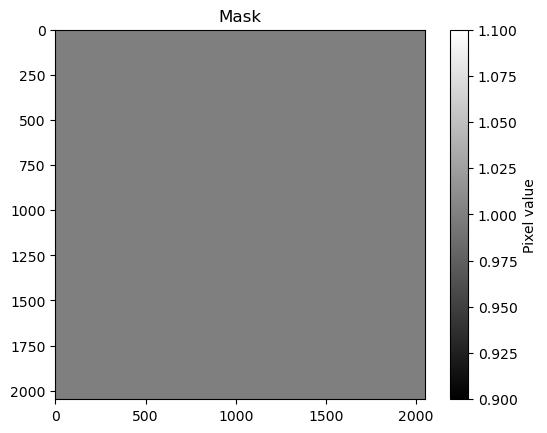

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title("Mask")
plt.colorbar(label="Pixel value")
plt.show()

In [1]:
import numpy as np
from src import fourier

ampta = 0.95 + 0.0j
ampvc = 1.0 + 0.0j
famp = fourier.mask(mask, ampta, ampvc)
rfamp = np.maximum(np.log(np.abs(famp)) + 10, 0)


ModuleNotFoundError: No module named 'src'

In [1]:
famp[0, 0], famp[0, 1:10], famp[1, 1:10]

NameError: name 'famp' is not defined

In [46]:
mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

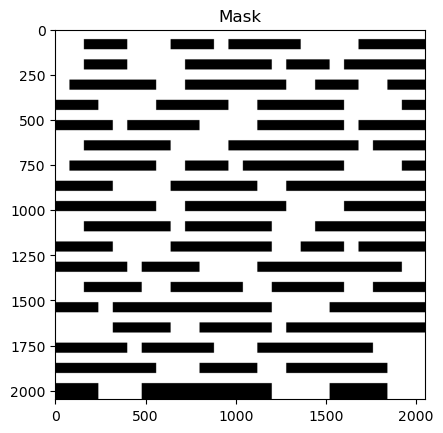

In [47]:
plt.imshow(mask, cmap='gray')
plt.title("Mask")
# plt.colorbar()
plt.show()

In [25]:
from src.source import source

source()

([[[0]]], [[[0]]], array([[1]]))

In [7]:

%load_ext autoreload
%autoreload 2
from src.intensity import intensity

intensity_map = intensity(mask)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


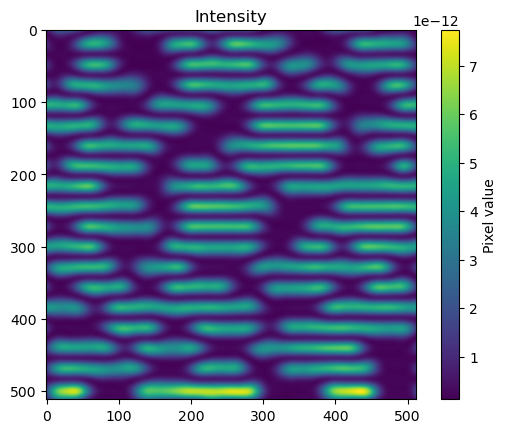

In [8]:
from matplotlib import pyplot as plt
plt.imshow(intensity_map)
plt.title("Intensity")
plt.colorbar(label="Pixel value")
plt.show()

In [35]:
intensity_map.shape

(512, 512)

In [36]:
intensity_map[0, 0]

np.float64(6.943117500093335e-13)